In [1]:

!pip -q install "monai-weekly" "torch>=2.1" "tqdm"
import monai.data
import sklearn
import sklearn.model_selection
import monai, torch, os, tempfile, matplotlib.pyplot as plt
from monai.data import DataLoader, CacheDataset
from monai.networks.nets import UNet
from monai.losses import DiceLoss
from monai.metrics import DiceMetric
## Download the dataset

from monai.apps import download_and_extract
root_dir = '.'
resource = 'https://msd-for-monai.s3-us-west-2.amazonaws.com/Task09_Spleen.tar'
compressed_file = os.path.join(root_dir, "spleen.tar")
download_and_extract(resource, compressed_file, root_dir)

from glob import glob

images = sorted(glob(os.path.join(root_dir,"Task09_Spleen/imagesTr/*.nii.gz")))
labels = sorted(glob(os.path.join(root_dir,"Task09_Spleen/labelsTr/*.nii.gz")))

all_files = [{"image":img, "label":lbl} for img,lbl in zip(images,labels)]
train_files, val_files = sklearn.model_selection.train_test_split(
    all_files, test_size=.2
)

from monai import transforms as T

def make_transform(n_pixels=64):
    # Steps to transform the file information to model inputs:

    transforms = []

    # step 1: load the data, nii.gz format to tensor
    transforms.append(
        T.LoadImaged(keys=['image', 'label'])
    )

    # step 2: Add an extra "channel" dimension (pytorch/monai convention)
    transforms.append(
        T.EnsureChannelFirstd(keys=['image', 'label'])
    )

    transforms.append(
        T.CropForegroundd(keys=["image", "label"], source_key="image", allow_smaller=True)
    )

    # step 3: Resize the data to a uniform size
    transforms.append(
        T.ResizeD(keys=['image', 'label'], spatial_size=(n_pixels, n_pixels, n_pixels//2), mode=['bilinear', 'nearest'])
    )

    # step 4: rescale the image intenisty between 0 and 1
    transforms.append(T.ScaleIntensityD(keys=['image']))

    transform = T.Compose(transforms)
    return transform


transform = make_transform(96)

# create dataset and dataloader
train_ds = train_dataset = monai.data.CacheDataset(train_files, transform=transform, cache_rate=1)
val_ds = monai.data.CacheDataset(val_files, transform=transform)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=4, shuffle=False)



/Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <BD0BF3A8-D5AB-3800-B76D-0E8456DB6589> /Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <25C510F7-7AEE-3D64-80ED-95874DC6BECD> /Users/pwilson/anaconda3/envs/ai/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


2025-08-04 13:56:52,076 - INFO - Expected md5 is None, skip md5 check for file spleen.tar.
2025-08-04 13:56:52,077 - INFO - File exists: spleen.tar, skipped downloading.
2025-08-04 13:56:52,078 - INFO - Writing into directory: ..


Loading dataset: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]


In [2]:
# build a model 
from torch import nn 
from models import EncoderDecoderNetwork


model = EncoderDecoderNetwork()

Using device cpu


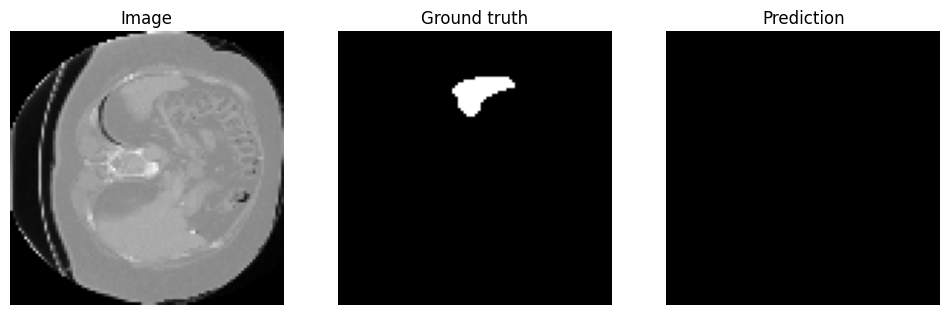

100%|██████████| 3/3 [00:01<00:00,  2.91it/s]         


Val dice: 0.00309577863663435
Best val dice observed at epoch 0


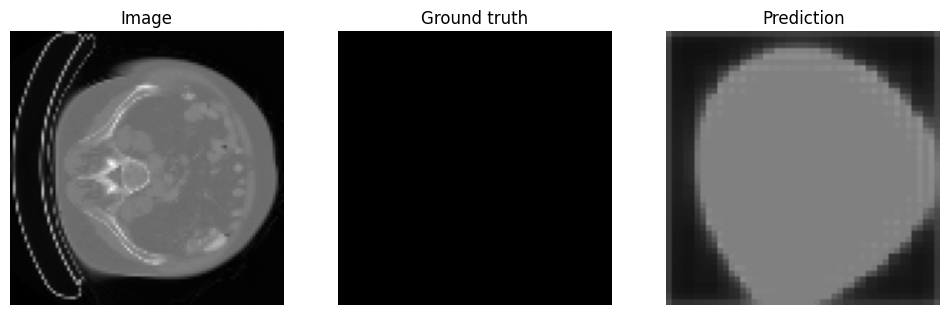

Epoch 1, avg loss: 0.5974


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]         


Val dice: 0.06903345137834549
Best val dice observed at epoch 1
Epoch 2, avg loss: 0.5503


100%|██████████| 3/3 [00:01<00:00,  2.97it/s]         


Val dice: 0.13721005618572235
Best val dice observed at epoch 2
Epoch 3, avg loss: 0.5304


100%|██████████| 3/3 [00:01<00:00,  2.90it/s]         


Val dice: 0.1548597365617752
Best val dice observed at epoch 3
Epoch 4, avg loss: 0.5182


100%|██████████| 3/3 [00:01<00:00,  2.92it/s]         


Val dice: 0.3090568780899048
Best val dice observed at epoch 4
Epoch 5, avg loss: 0.5074


100%|██████████| 3/3 [00:01<00:00,  2.87it/s]         


Val dice: 0.22862723469734192


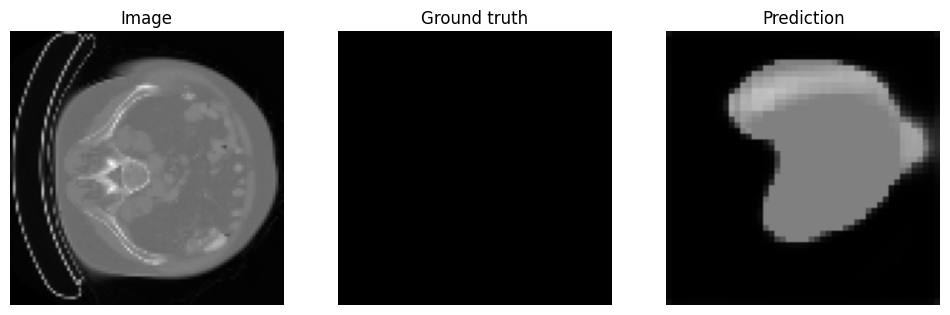

Epoch 6, avg loss: 0.4777


100%|██████████| 3/3 [00:01<00:00,  2.88it/s]         


Val dice: 0.2964780628681183
Epoch 7, avg loss: 0.4736


100%|██████████| 3/3 [00:01<00:00,  2.88it/s]         


Val dice: 0.3033253848552704
Epoch 8, avg loss: 0.4666


100%|██████████| 3/3 [00:01<00:00,  2.93it/s]         


Val dice: 0.2627391815185547
Epoch 9, avg loss: 0.4387


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]         


Val dice: 0.3104797303676605
Best val dice observed at epoch 9
Epoch 10, avg loss: 0.4389


100%|██████████| 3/3 [00:01<00:00,  2.99it/s]          


Val dice: 0.22011226415634155


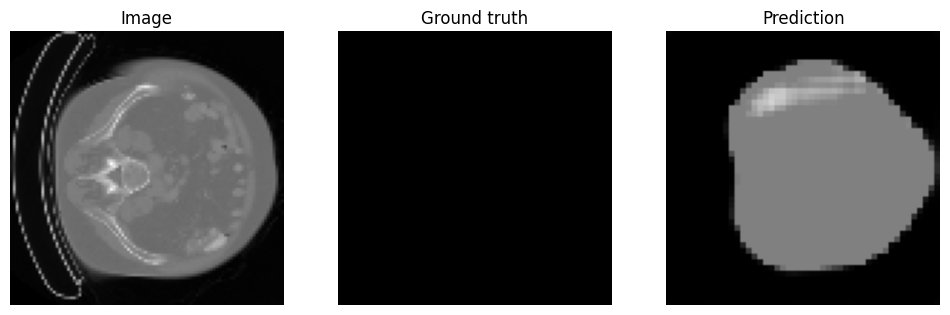

Epoch 11, avg loss: 0.4230


100%|██████████| 3/3 [00:01<00:00,  2.93it/s]          


Val dice: 0.30280107259750366
Epoch 12, avg loss: 0.4348


100%|██████████| 3/3 [00:01<00:00,  2.75it/s]          


Val dice: 0.31273141503334045
Best val dice observed at epoch 12
Epoch 13, avg loss: 0.4122


100%|██████████| 3/3 [00:01<00:00,  2.98it/s]          


Val dice: 0.34110909700393677
Best val dice observed at epoch 13
Epoch 14, avg loss: 0.3710


100%|██████████| 3/3 [00:01<00:00,  2.93it/s]          


Val dice: 0.4198507070541382
Best val dice observed at epoch 14
Epoch 15, avg loss: 0.3436


100%|██████████| 3/3 [00:01<00:00,  2.79it/s]          


Val dice: 0.4365243911743164
Best val dice observed at epoch 15


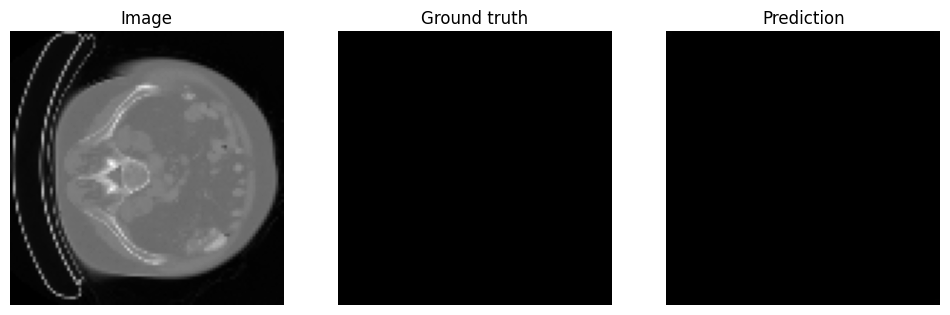

Epoch 16, avg loss: 0.3594


100%|██████████| 3/3 [00:01<00:00,  2.82it/s]          


Val dice: 0.3588823676109314
Epoch 17, avg loss: 0.3442


100%|██████████| 3/3 [00:01<00:00,  2.91it/s]          


Val dice: 0.45654597878456116
Best val dice observed at epoch 17
Epoch 18, avg loss: 0.3571


100%|██████████| 3/3 [00:01<00:00,  2.83it/s]          


Val dice: 0.45817768573760986
Best val dice observed at epoch 18
Epoch 19, avg loss: 0.3295


100%|██████████| 3/3 [00:01<00:00,  2.97it/s]          


Val dice: 0.3803434669971466
Epoch 20, avg loss: 0.3359


100%|██████████| 3/3 [00:01<00:00,  2.96it/s]          


Val dice: 0.47584062814712524
Best val dice observed at epoch 20


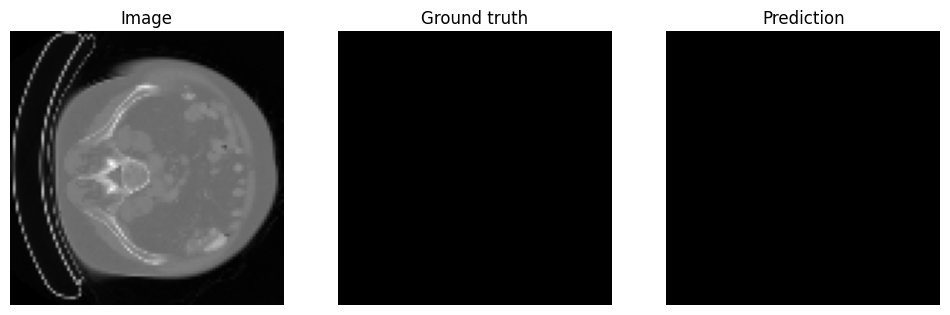

Epoch 21, avg loss: 0.3232


100%|██████████| 3/3 [00:01<00:00,  2.90it/s]          


Val dice: 0.36113283038139343
Epoch 22, avg loss: 0.3245


100%|██████████| 3/3 [00:01<00:00,  2.95it/s]          


Val dice: 0.34843146800994873
Epoch 23, avg loss: 0.3164


100%|██████████| 3/3 [00:01<00:00,  2.94it/s]          


Val dice: 0.489664226770401
Best val dice observed at epoch 23
Epoch 24, avg loss: 0.3136


100%|██████████| 3/3 [00:01<00:00,  2.91it/s]          


Val dice: 0.49287667870521545
Best val dice observed at epoch 24
Epoch 25, avg loss: 0.3020


100%|██████████| 3/3 [00:01<00:00,  2.89it/s]          


Val dice: 0.4431527256965637


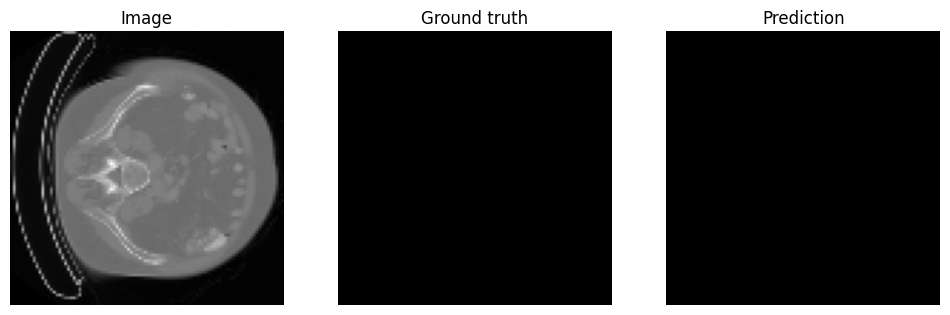

Epoch 26, avg loss: 0.3012


100%|██████████| 3/3 [00:01<00:00,  2.86it/s]          


Val dice: 0.5142243504524231
Best val dice observed at epoch 26
Epoch 27, avg loss: 0.3012


100%|██████████| 3/3 [00:01<00:00,  2.97it/s]          


Val dice: 0.3441753089427948
Epoch 28, avg loss: 0.3027


100%|██████████| 3/3 [00:01<00:00,  2.67it/s]          


Val dice: 0.5051518082618713
Epoch 29, avg loss: 0.3010


100%|██████████| 3/3 [00:01<00:00,  2.55it/s]          


Val dice: 0.4383086860179901
Epoch 30, avg loss: 0.2886


100%|██████████| 3/3 [00:01<00:00,  2.89it/s]          


Val dice: 0.543390154838562
Best val dice observed at epoch 30


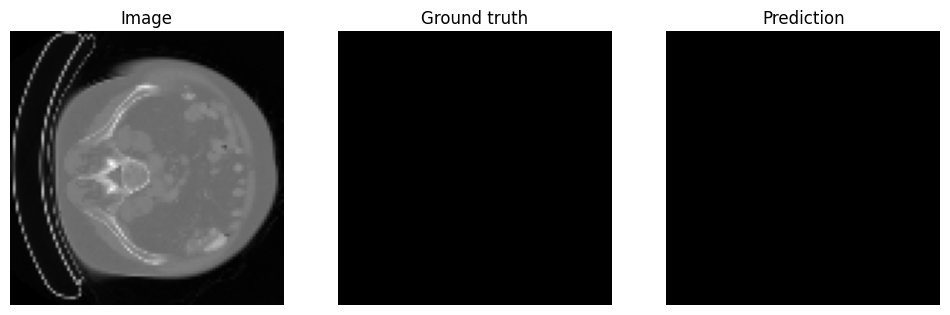

Epoch 31, avg loss: 0.2781


100%|██████████| 3/3 [00:01<00:00,  2.80it/s]          


Val dice: 0.46455419063568115
Epoch 32, avg loss: 0.2783


100%|██████████| 3/3 [00:01<00:00,  2.89it/s]          


Val dice: 0.48436540365219116
Epoch 33, avg loss: 0.2668


100%|██████████| 3/3 [00:01<00:00,  2.92it/s]          


Val dice: 0.41541627049446106
Epoch 34, avg loss: 0.2522


100%|██████████| 3/3 [00:01<00:00,  2.88it/s]          


Val dice: 0.47779029607772827
Epoch 35, avg loss: 0.2641


100%|██████████| 3/3 [00:01<00:00,  2.89it/s]          


Val dice: 0.5541634559631348
Best val dice observed at epoch 35


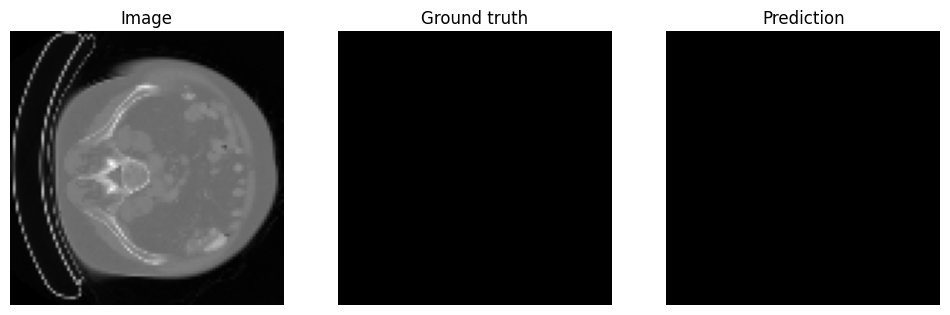

Epoch 36, avg loss: 0.2565


100%|██████████| 3/3 [00:01<00:00,  2.80it/s]          


Val dice: 0.42856720089912415
Epoch 37, avg loss: 0.2901


100%|██████████| 3/3 [00:01<00:00,  2.81it/s]          


Val dice: 0.5486206412315369
Epoch 38, avg loss: 0.2629


100%|██████████| 3/3 [00:01<00:00,  2.76it/s]          


Val dice: 0.30383777618408203
Epoch 39, avg loss: 0.2338


100%|██████████| 3/3 [00:01<00:00,  2.68it/s]          


Val dice: 0.4838002622127533
Epoch 40, avg loss: 0.2430


100%|██████████| 3/3 [00:01<00:00,  2.62it/s]          


Val dice: 0.45040416717529297


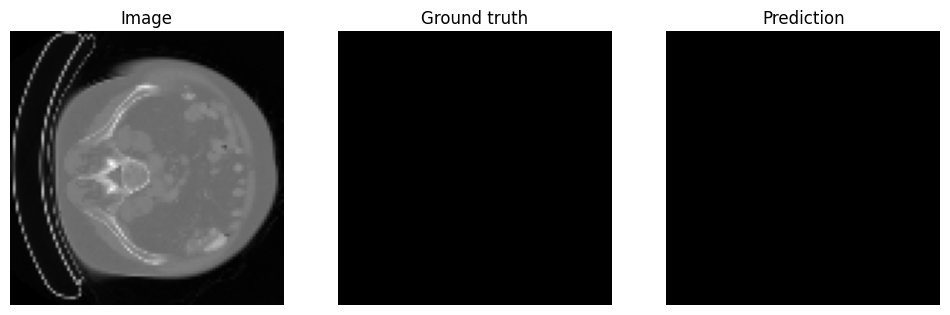

Epoch 41, avg loss: 0.2357


100%|██████████| 3/3 [00:01<00:00,  2.82it/s]          


Val dice: 0.4324582517147064
Epoch 42, avg loss: 0.2392


100%|██████████| 3/3 [00:01<00:00,  2.92it/s]          


Val dice: 0.40153124928474426
Epoch 43, avg loss: 0.2353


100%|██████████| 3/3 [00:01<00:00,  2.82it/s]          


Val dice: 0.5306273698806763
Epoch 44, avg loss: 0.2409


100%|██████████| 3/3 [00:01<00:00,  2.76it/s]          


Val dice: 0.39576923847198486
Epoch 45, avg loss: 0.2521


100%|██████████| 3/3 [00:01<00:00,  2.74it/s]          


Val dice: 0.49829450249671936


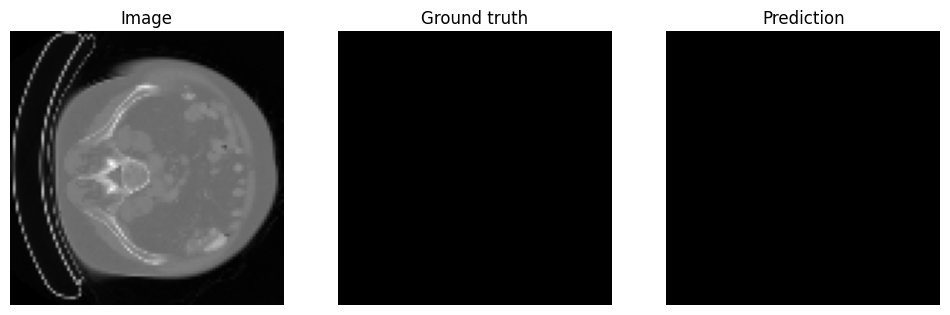

Epoch 46, avg loss: 0.2260


100%|██████████| 3/3 [00:01<00:00,  2.82it/s]          


Val dice: 0.47067520022392273
Epoch 47, avg loss: 0.2246


100%|██████████| 3/3 [00:01<00:00,  2.70it/s]          


Val dice: 0.42169857025146484
Epoch 48, avg loss: 0.2294


100%|██████████| 3/3 [00:01<00:00,  2.83it/s]          


Val dice: 0.4018588066101074
Epoch 49, avg loss: 0.2264


100%|██████████| 3/3 [00:01<00:00,  2.79it/s]          


Val dice: 0.5431548953056335
Epoch 50, avg loss: 0.2163


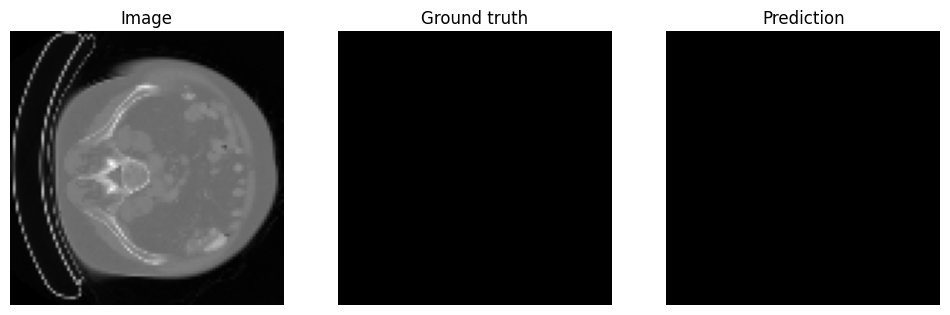

In [7]:


device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)  # device to run calculations - "cuda" means gpu

print(f"Using device {device}")
model.to(device)  # convert model to the correct device

loss_fn = DiceLoss(to_onehot_y=True, softmax=True)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)


def run_model_and_show_example(model, sample, binarize_output=True):
    model.eval()
    with torch.no_grad():
        input_volume = sample["image"].unsqueeze(0).to(device)

        if binarize_output:
            pred = torch.argmax(model(input_volume), dim=1).cpu()[0]
        else:
            pred = torch.softmax(model(input_volume), dim=1).cpu()[0, 1]

    import numpy as np, matplotlib.pyplot as plt

    mid_slice = pred.shape[-1] // 2
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(input_volume.cpu()[0, 0, :, :, mid_slice], cmap="gray")
    plt.title("Image")
    plt.axis("off")
    plt.subplot(1, 3, 2)
    plt.imshow(sample["label"][0, :, :, mid_slice], cmap="gray")
    plt.title("Ground truth")
    plt.axis("off")
    plt.subplot(1, 3, 3)
    plt.imshow(pred[:, :, mid_slice], cmap="gray", vmin=0, vmax=1)
    plt.title("Prediction")
    plt.axis("off")
    plt.show()


run_model_and_show_example(model, train_ds[0])
# Training loop

from tqdm import tqdm

max_epochs = 50
best_val_dice = 0
best_model_state = model.state_dict()

for epoch in range(max_epochs):
    model.train()

    epoch_loss = 0

    for batch_data in tqdm(train_loader, desc=f"Epoch {epoch}", leave=False):
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        epoch_loss += loss.item()

    dice_metric = DiceMetric(include_background=False)
    model.eval()
    for batch_data in tqdm(val_loader):
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        dice_metric(outputs.argmax(1), labels[:, 0])
    val_dice = dice_metric.aggregate().item()
    print(f"Val dice: {val_dice}")
    if val_dice > best_val_dice: 
        print(f"Best val dice observed at epoch {epoch}")
        best_val_dice = val_dice
        best_model_state = model.state_dict()

    if epoch % 5 == 0:
        run_model_and_show_example(model, val_ds[0], binarize_output=False)

    print(f"Epoch {epoch+1}, avg loss: {epoch_loss/len(train_loader):.4f}")

model.load_state_dict(best_model_state)
run_model_and_show_example(model, val_ds[0], binarize_output=False)

In [8]:
torch.save(best_model_state, 'encoder_decoder_spleen_seg.pt')